---
title: "Migraine Symptom Analysis"
author: "Haneen Abbas"
format: html
jupyter: python3
execute:
  echo: true
---

# Migraine Dataset
## Research question
**How do symptom severity patterns differ across migraine types?**

**Audience:** Individuals interested in understanding how migraine subtypes differ clinically (i.e. patients, clinicians, public health analysts)

**Motivation:** Understanding symptom severity patterns across migraine types can inform diagnosis, patient education, and targeted treatment strategies

## Data Source and Ethics

The dataset was obtained from Kaggle and contains anonymous clinical symptom data  
No sensitive information is included

**Ethical Considerations and Limitations**  
- Symptoms may be self reported and subject to reporting bias  
- Diagnostic criteria for migraine types are not fully documented in the source  
- The dataset may not be representative of all migraine populations  

In [41]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier

path = kagglehub.dataset_download("ranzeet013/migraine-dataset")
migraine = pd.read_csv(os.path.join(path, os.listdir(path)[0]))

## Data Wrangling

Key steps included  
- Selecting relevant symptom severity and target variables  
- Filtering and organizing columns for analysis  
- Groupby aggregation to compute symptom prevalence by migraine type  
- Label encoding of migraine types for machine learning  
- Consolidation of symptom and severity features for modeling  

All analyses are reproducible 

In [ ]:
symptom_cols = [
    'Nausea', 'Vomit', 'Phonophobia', 'Photophobia',
    'Visual', 'Sensory', 'Vertigo', 'Tinnitus',
    'Hypoacusis', 'Dysphasia', 'Dysarthria',
    'Diplopia', 'Defect', 'Ataxia',
    'Conscience', 'Paresthesia'
]

severity_cols = ['Duration', 'Frequency', 'Intensity', 'DPF']
target_col = 'Type'


## Visualizations
Visual encodings were selected to align with analytical goals  
Distributions were examined using histograms  
Comparisons across migraine types were shown using violin plots  
Relationships between severity measures were explored with scatterplots  
Multivariate symptom patterns were visualized using heatmaps

### Age of Patients 

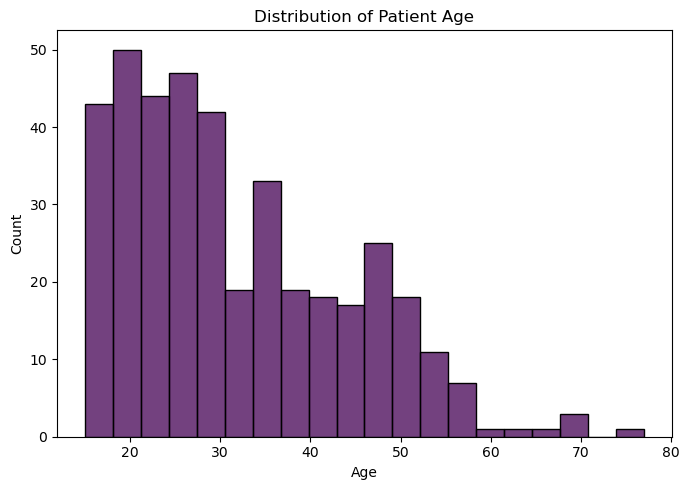

In [43]:
plt.figure(figsize=(7, 5))
sns.histplot(migraine['Age'], bins = 20, color='#440154')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


This shows the age distribution of individuals in the dataset, providing context for the migraine cases analyzed. The highest amount of individuals experiencing migraines range from 18-30 with sporadic spikes of individuals experiencing migraines at ages as old as 70 and above

### Duration by Migraine Type

In [44]:

fig = px.violin(
    migraine,
    x='Type',
    y='Duration',
    box=True,
    points='all',
    color='Type',
    color_discrete_sequence=['#440154'],
)

fig.update_layout(
    title='Migraine Duration by Type',
    xaxis_title='Migraine Type',
    yaxis_title='Duration',
    showlegend=True
)

fig.show()

Migraine duration varies across migraine types, with some types showing longer and more variable episode lengths than others. Sporadic hemiplegic migraines tend to have a shorter duration in relation to basilar-type migraines. Typical aura with migraines tends to have a varied duration with a high amount of individuals experiencing a migraine that lasts an hour.

### Duration vs Intensity

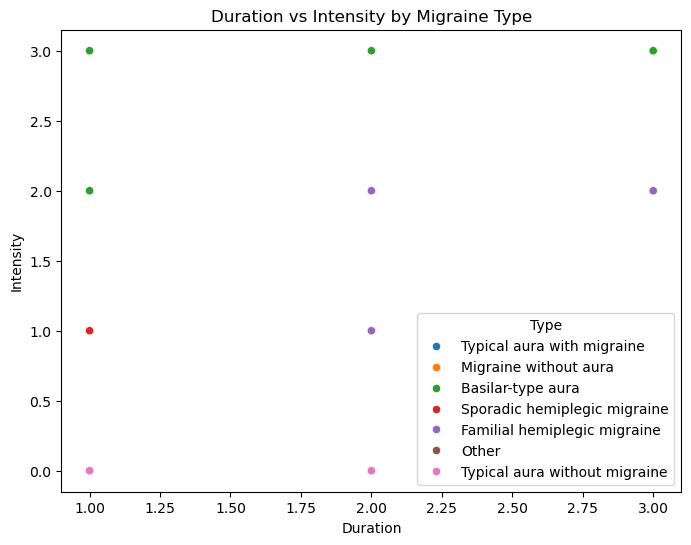

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=migraine, x='Duration', y='Intensity', hue='Type')
plt.title('Duration vs Intensity by Migraine Type')
plt.xlabel('Duration')
plt.ylabel('Intensity')
plt.show()


The relationship between migraine duration and intensity differs by migraine type, indicating that these two measures of severity are not always aligned

### Heatmap of Symptoms by Migraine Type 

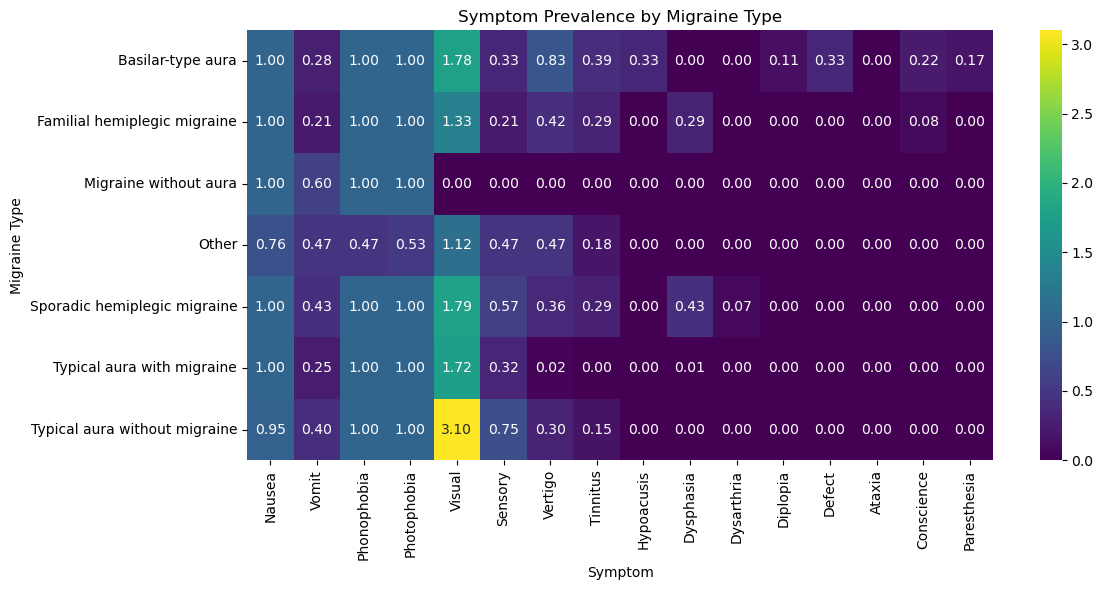

In [46]:
symptom_prevalence = migraine.groupby(target_col)[symptom_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(symptom_prevalence, cmap='viridis', annot=True, fmt='.2f')
plt.title('Symptom Prevalence by Migraine Type')
plt.xlabel('Symptom')
plt.ylabel('Migraine Type')
plt.tight_layout()
plt.show()


Symptom prevalence patterns differ across migraine types, suggesting that each type is associated with a distinct combination of symptoms. The strongest symptom prevalence by migraine type is typical aura with migraine and visual symptoms.

### Neurological Symptom Clustering

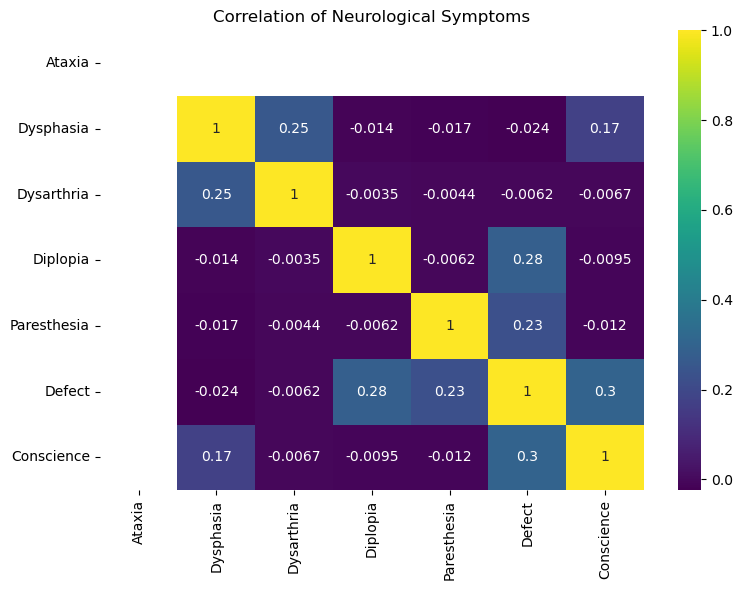

In [47]:
neuro_cols = [
    'Ataxia','Dysphasia', 'Dysarthria', 'Diplopia',
    'Paresthesia', 'Defect', 'Conscience'
]

neuro_corr = migraine[neuro_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(neuro_corr, cmap='viridis', annot=True)
plt.title('Correlation of Neurological Symptoms')
plt.tight_layout()
plt.show()


Several neurological symptoms show strong correlations, which may help explain overlap between certain migraine types. There seems to be strong correlation between dysphasia and conscience versus a lack of correlation between ataxia and any other neurological symptom. 

### ML

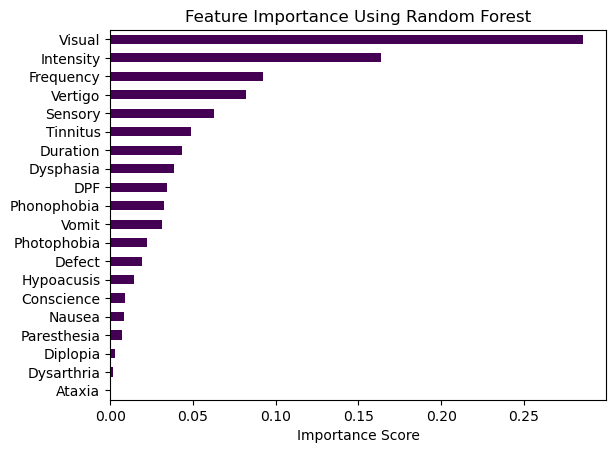

In [48]:
feature_cols = symptom_cols + severity_cols

X = migraine[feature_cols]
y = migraine['Type'].astype('category').cat.codes

model = RandomForestClassifier(random_state=42).fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()

importances.plot(kind='barh', color='#440154')
plt.title('Feature Importance Using Random Forest')
plt.xlabel('Importance Score')
plt.show()


Feature importance results indicate that both symptom presence and severity measures contribute to distinguishing migraine types, with visual symptoms being dominant and ataxia being irrelevant

## Key Insights

Migraine types differ in both symptom presence and severity structure  
Visual and sensory symptoms play a strong role in distinguishing migraine classifications  
Duration and intensity do not scale uniformly indicating that longer migraines are not always more intense  
Neurological symptoms cluster together suggesting shared underlying mechanisms across multiple migraine types  

These findings highlight variability between migraine classifications and reinforce the importance of symptom specific analysis

## Data Dictionary

| Variable | Description |
|--------|------------|
| Age | Patient age in years |
| Type | Migraine classification |
| Duration | Duration of migraine episode |
| Frequency | Frequency of migraine occurrence |
| Intensity | Reported migraine intensity |
| DPF | Daily pain frequency score |
| Nausea | Presence of nausea |
| Vomit | Presence of vomiting |
| Phonophobia | Sensitivity to sound |
| Photophobia | Sensitivity to light |
| Visual | Visual disturbances |
| Sensory | Sensory disturbances |
| Vertigo | Presence of vertigo |
| Tinnitus | Presence of tinnitus |
| Hypoacusis | Reduced hearing |
| Dysphasia | Language impairment |
| Dysarthria | Speech difficulty |
| Diplopia | Double vision |
| Defect | Neurological defect |
| Ataxia | Loss of coordination |
| Conscience | Altered consciousness |
| Paresthesia | Tingling or numbness |

## Resources
- https://www.kaggle.com/datasets/ranzeet013/migraine-dataset/data
- https://www.junjunyin.com/datascience/dats2102/
- https://www.geeksforgeeks.org/
- https://stackoverflow.com/questions
- https://seaborn.pydata.org/
- https://matplotlib.org/stable/index.html
- https://plotly.com/python/
- https://scikit-learn.org/stable/

## Disclaimer
I used AI to help debug my code and used grammarly to fix grammatical errors